<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Fawwaz !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Fawwaz ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Fawwaz dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Deskripsi tugas

Perusahaan taksi bernama Sweet Lift telah mengumpulkan data historis tentang pesanan taksi di bandara. Untuk menarik lebih banyak pengemudi pada jam sibuk, perlu memprediksi jumlah pesanan taksi untuk satu jam berikutnya. Buat model untuk prediksi seperti itu.

Metrik RMSE pada *test set* tidak boleh lebih dari 48.

## Instruksi tugas

1. Unduh data dan lakukan *resampling* dalam satu jam.
2. Analisis datanya.
3.  Latih model yang berbeda dengan hiperparameter yang berbeda pula. Sampel tes harus 10% dari *dataset* awal.
4. Uji data menggunakan sampel tes dan berikan kesimpulan.

## Deskripsi data

Data tersimpan di file `taxi.csv`. Jumlah pesanan di kolom'*num_orders*'.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Persiapan

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)
df = df.resample('1H').sum()

In [3]:
df.index.is_monotonic

True

In [4]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [6]:
df.isna().sum()

num_orders    0
dtype: int64

In [7]:
df.duplicated().sum()

4165

In [8]:
df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


In [9]:
df.index

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 01:00:00',
               '2018-03-01 02:00:00', '2018-03-01 03:00:00',
               '2018-03-01 04:00:00', '2018-03-01 05:00:00',
               '2018-03-01 06:00:00', '2018-03-01 07:00:00',
               '2018-03-01 08:00:00', '2018-03-01 09:00:00',
               ...
               '2018-08-31 14:00:00', '2018-08-31 15:00:00',
               '2018-08-31 16:00:00', '2018-08-31 17:00:00',
               '2018-08-31 18:00:00', '2018-08-31 19:00:00',
               '2018-08-31 20:00:00', '2018-08-31 21:00:00',
               '2018-08-31 22:00:00', '2018-08-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=4416, freq='H')

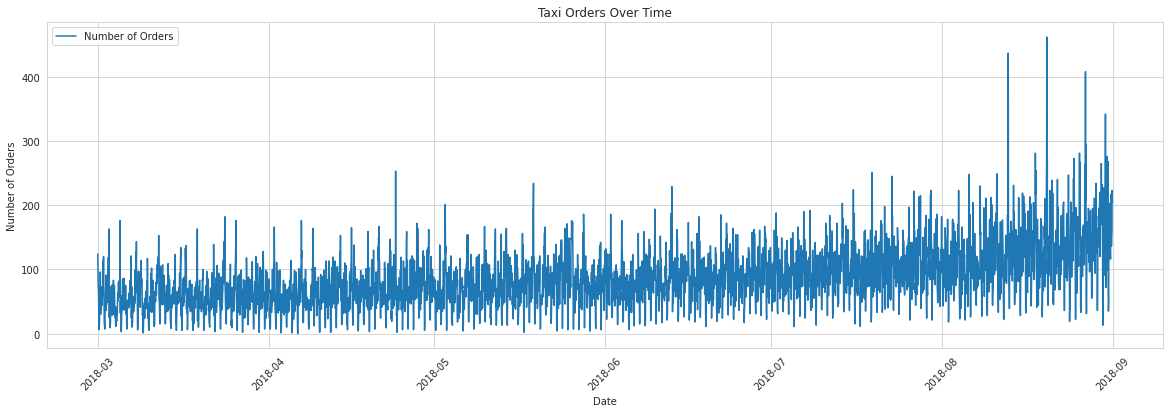

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x=df.index, y='num_orders', label='Number of Orders')
plt.title('Taxi Orders Over Time')
plt.xlabel('Date') 
plt.ylabel('Number of Orders') 
plt.xticks(rotation=45)
plt.legend()
plt.show()

Dataset terdiri dari data order taxi selama bulan maret hingga agustus tahun 2018.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Analisis

Pada tahap ini kita akan melakukan analisa pada dataset time series kita.

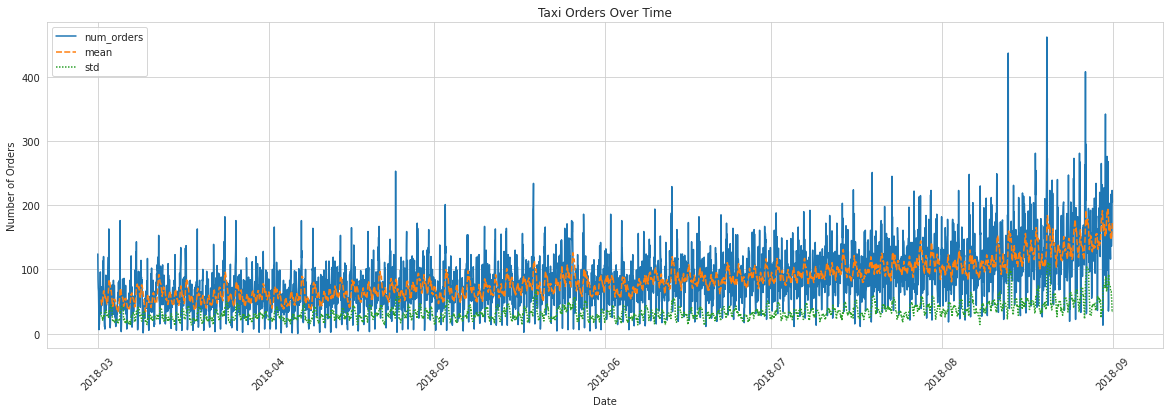

In [11]:
plt.figure(figsize=(20, 6))
df_tmp = df.copy()
df_tmp = df_tmp.resample('1H').sum()
df_tmp['mean'] = df_tmp['num_orders'].rolling(15).mean()
df_tmp['std'] = df_tmp['num_orders'].rolling(15).std()
sns.lineplot(data=df_tmp)
plt.title('Taxi Orders Over Time')
plt.xlabel('Date') 
plt.ylabel('Number of Orders') 
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.legend()  
plt.show()

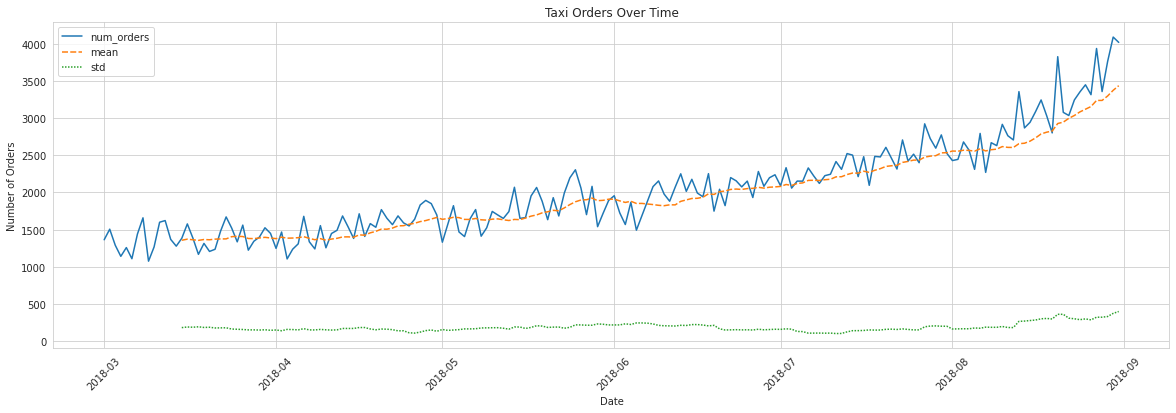

In [12]:
plt.figure(figsize=(20, 6))
df_tmp = df.copy()
df_tmp = df_tmp.resample('1D').sum()
df_tmp['mean'] = df_tmp['num_orders'].rolling(15).mean()
df_tmp['std'] = df_tmp['num_orders'].rolling(15).std()
sns.lineplot(data=df_tmp)
plt.title('Taxi Orders Over Time')
plt.xlabel('Date') 
plt.ylabel('Number of Orders') 
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.legend()  
plt.show()

Disini terlihat tren yang meningkat dan standar deviasi yang cenderung datar.

In [13]:
def sdc(df, start, end, decompose):   
    df_tmp1 = df.copy()
    df_tmp1 = df_tmp1[start:end].resample(decompose).sum()

    decomposed = seasonal_decompose(df_tmp1)

    plt.figure(figsize=(20, 8))
    plt.subplot(311)
    decomposed.trend.plot(ax=plt.gca())
    plt.title('Trend')
    plt.subplot(312)
    decomposed.seasonal.plot(ax=plt.gca())
    plt.title('Seasonality')
    plt.subplot(313)
    decomposed.resid.plot(ax=plt.gca())
    plt.title('Residuals')
    plt.tight_layout() 

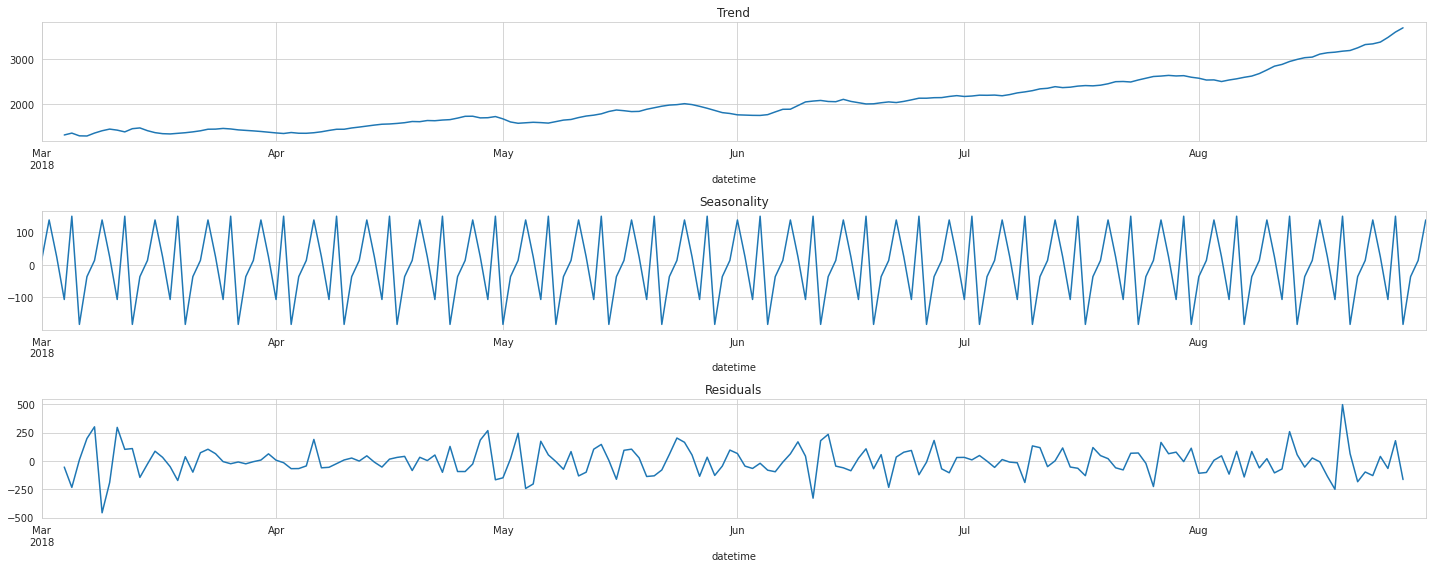

In [14]:
sdc(df, '2018-03', '2018-09', '1D')

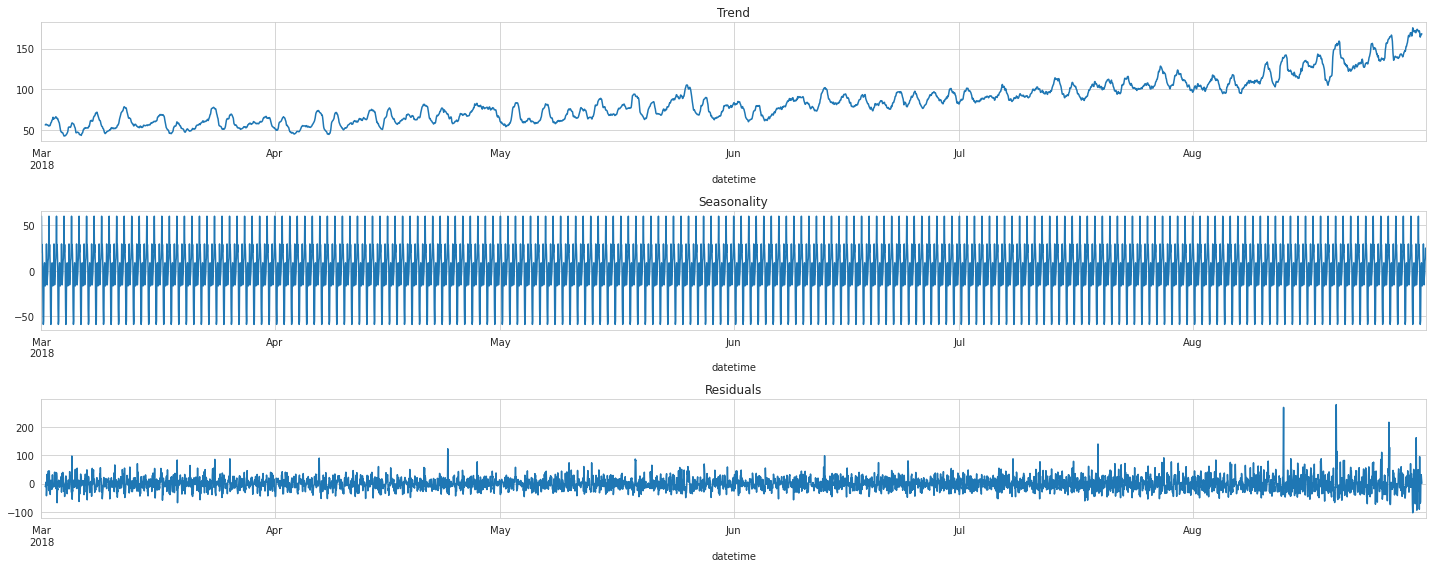

In [15]:
sdc(df, '2018-03', '2018-09', '1H')

Karena grafiknya tidak terlalu jelas kita akan membaginya untuk setiap bulan.

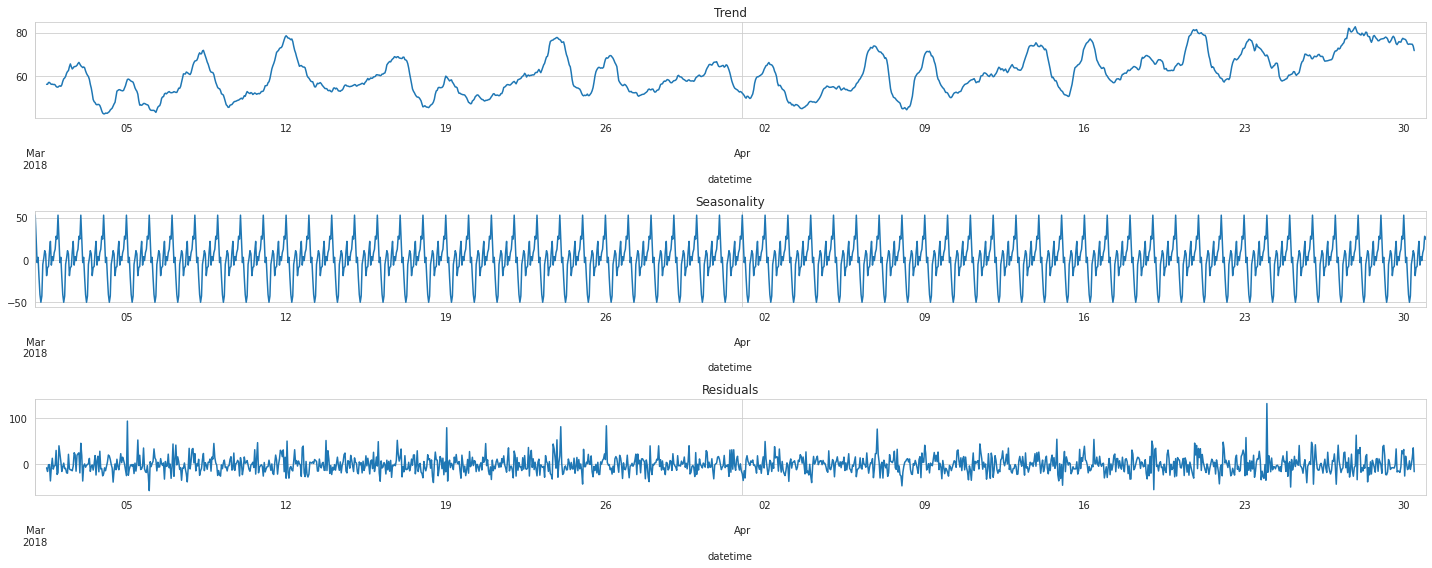

In [16]:
sdc(df, '2018-03', '2018-04', '1H')

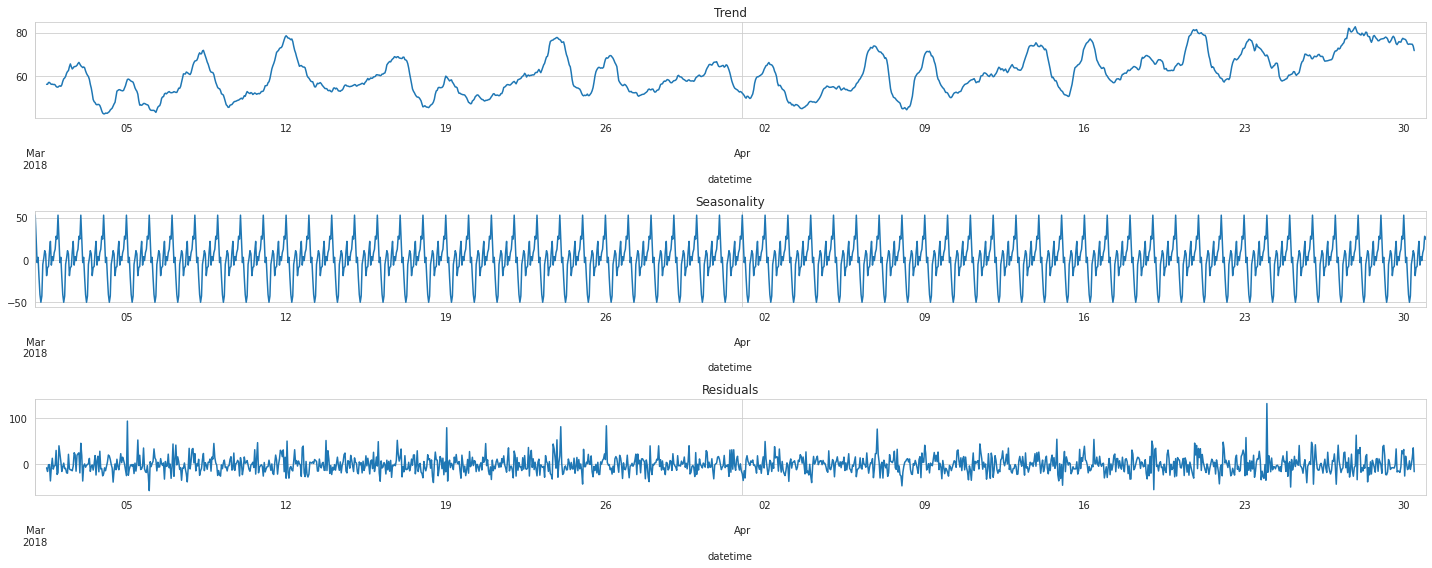

In [17]:
sdc(df, '2018-03', '2018-04', '1H')

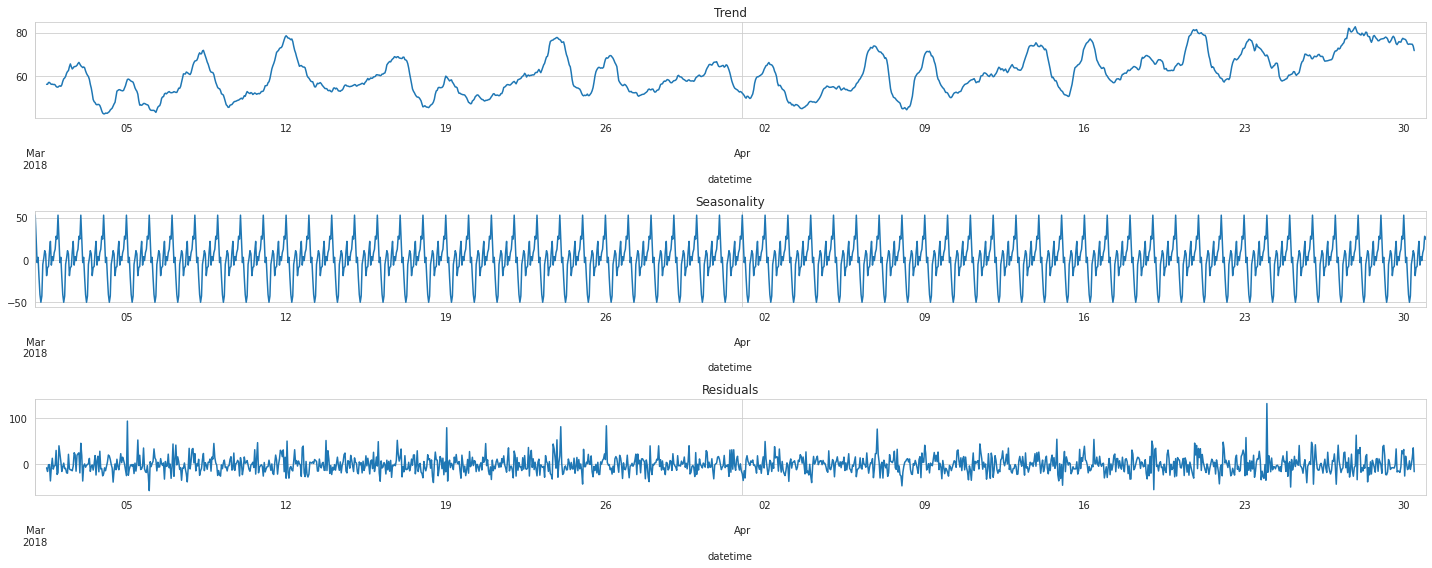

In [18]:
sdc(df, '2018-03', '2018-04', '1H')

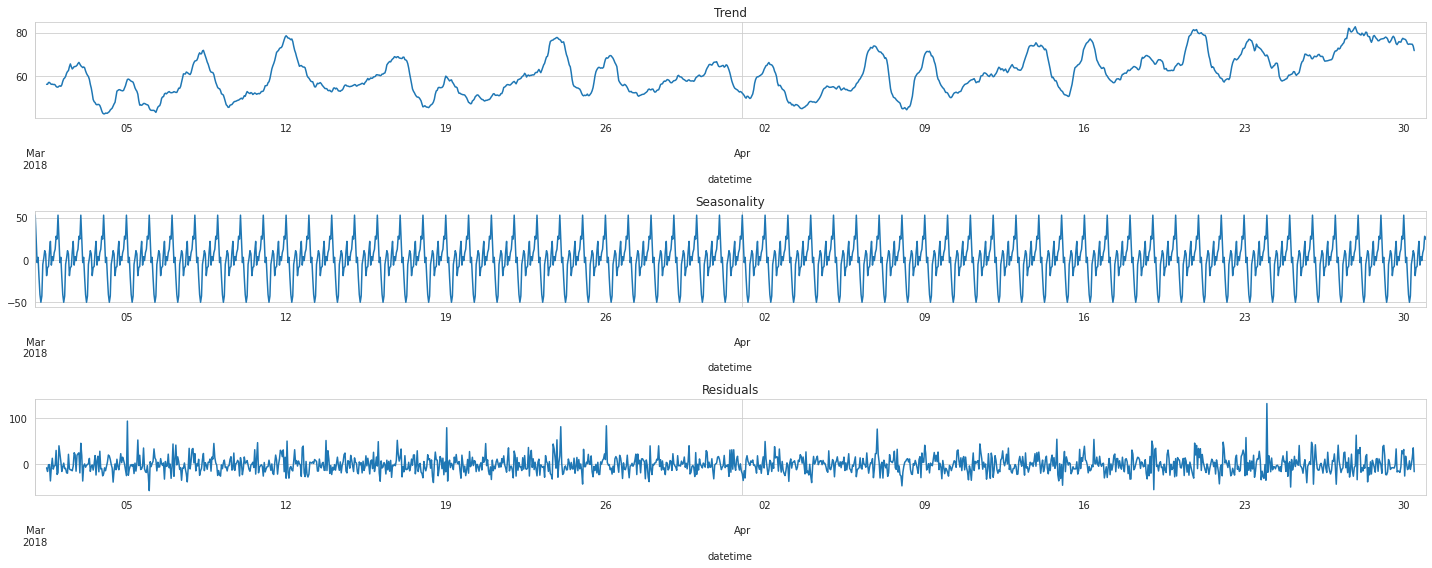

In [19]:
sdc(df, '2018-03', '2018-04', '1H')

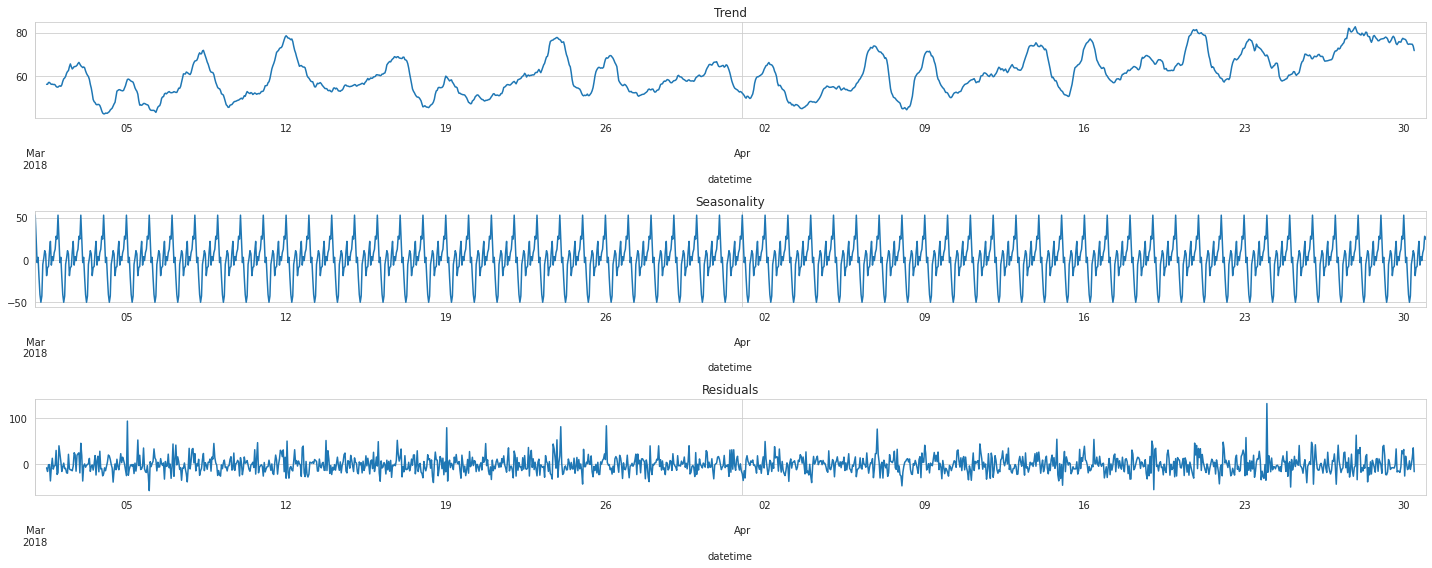

In [20]:
sdc(df, '2018-03', '2018-04', '1H')

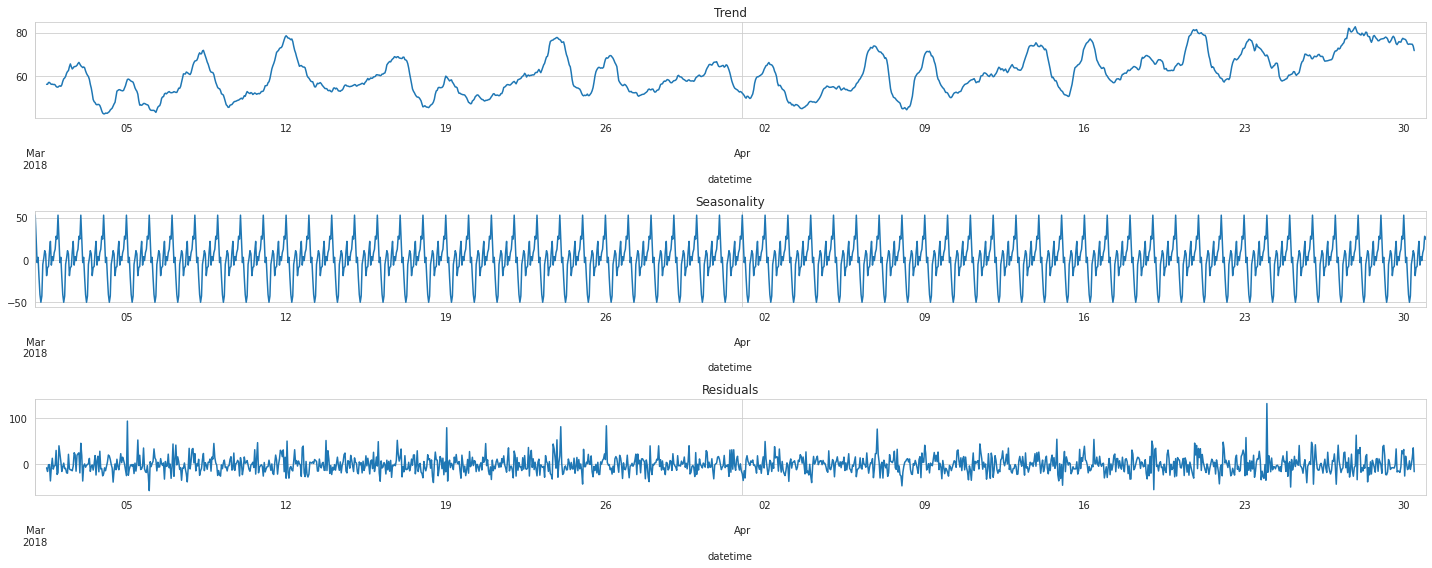

In [21]:
sdc(df, '2018-03', '2018-04', '1H')

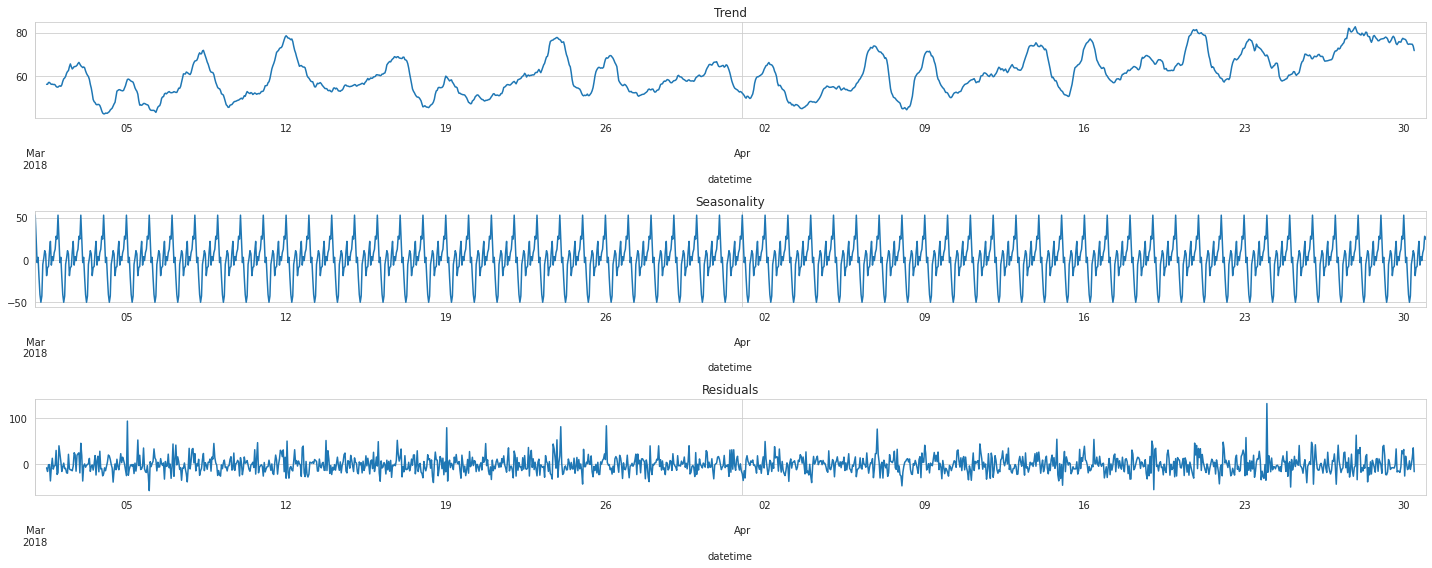

In [22]:
sdc(df, '2018-03', '2018-04', '1H')

Setelah dilakukan decompose pada data, diketahui ada tren yang meningkat dan seasonality harian yang additive. Karena terdapat tren dan seasonality maka data tersebut tidak stationaire.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Pelatihan Dan Pengujian

Selanjutnya kita akan melakukan pelatihan dan pengujian model. Pertama kitaakan menambahkan fitur pada dataset dan melakukan split untuk data train dan test.

In [23]:
def make_features(df, max_lag, rolling_mean_size):
    df['hour'] = df.index.hour
    df['dow'] = df.index.dayofweek
    df['day'] = df.index.day
    df['diff'] = df['num_orders'].diff(1)
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = (
        df['num_orders'].shift().rolling(rolling_mean_size).mean()
    )


make_features(df, 9, 9)

In [24]:
df_train, df_test = train_test_split(df, shuffle=False, test_size=0.1)
df_tmp = df_train.dropna()

In [25]:
df_tmp, df_val = train_test_split(df_tmp, shuffle=False, test_size=0.1)
df_train = df_tmp.dropna()

In [26]:
df_train.index

DatetimeIndex(['2018-03-01 09:00:00', '2018-03-01 10:00:00',
               '2018-03-01 11:00:00', '2018-03-01 12:00:00',
               '2018-03-01 13:00:00', '2018-03-01 14:00:00',
               '2018-03-01 15:00:00', '2018-03-01 16:00:00',
               '2018-03-01 17:00:00', '2018-03-01 18:00:00',
               ...
               '2018-07-27 15:00:00', '2018-07-27 16:00:00',
               '2018-07-27 17:00:00', '2018-07-27 18:00:00',
               '2018-07-27 19:00:00', '2018-07-27 20:00:00',
               '2018-07-27 21:00:00', '2018-07-27 22:00:00',
               '2018-07-27 23:00:00', '2018-07-28 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=3568, freq='H')

In [27]:
df_val.index

DatetimeIndex(['2018-07-28 01:00:00', '2018-07-28 02:00:00',
               '2018-07-28 03:00:00', '2018-07-28 04:00:00',
               '2018-07-28 05:00:00', '2018-07-28 06:00:00',
               '2018-07-28 07:00:00', '2018-07-28 08:00:00',
               '2018-07-28 09:00:00', '2018-07-28 10:00:00',
               ...
               '2018-08-13 04:00:00', '2018-08-13 05:00:00',
               '2018-08-13 06:00:00', '2018-08-13 07:00:00',
               '2018-08-13 08:00:00', '2018-08-13 09:00:00',
               '2018-08-13 10:00:00', '2018-08-13 11:00:00',
               '2018-08-13 12:00:00', '2018-08-13 13:00:00'],
              dtype='datetime64[ns]', name='datetime', length=397, freq='H')

In [28]:
df_test.index

DatetimeIndex(['2018-08-13 14:00:00', '2018-08-13 15:00:00',
               '2018-08-13 16:00:00', '2018-08-13 17:00:00',
               '2018-08-13 18:00:00', '2018-08-13 19:00:00',
               '2018-08-13 20:00:00', '2018-08-13 21:00:00',
               '2018-08-13 22:00:00', '2018-08-13 23:00:00',
               ...
               '2018-08-31 14:00:00', '2018-08-31 15:00:00',
               '2018-08-31 16:00:00', '2018-08-31 17:00:00',
               '2018-08-31 18:00:00', '2018-08-31 19:00:00',
               '2018-08-31 20:00:00', '2018-08-31 21:00:00',
               '2018-08-31 22:00:00', '2018-08-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=442, freq='H')

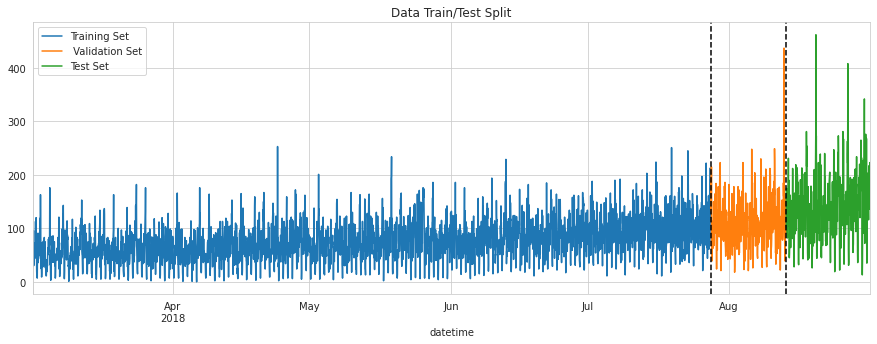

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
df_train['num_orders'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_val['num_orders'].plot(ax=ax, label='Validation Set')
df_test['num_orders'].plot(ax=ax, label='Test Set')
ax.axvline('2018-07-28 00:00:00', color='black', ls='--')
ax.axvline('2018-08-13 13:00:00', color='black', ls='--')
ax.legend(['Training Set',' Validation Set', 'Test Set'])
plt.show()

In [30]:
X_train = df_train.drop(['num_orders'], axis=1)
y_train = df_train['num_orders']
X_val = df_val.drop(['num_orders'], axis=1)
y_val = df_val['num_orders']
X_test = df_test.drop(['num_orders'],axis=1)
y_test = df_test['num_orders']

In [31]:
print('Training sample size:', X_train.shape)
print('Validation sample size:', X_val.shape)
print('Test sample size:', X_test.shape)

Training sample size: (3568, 14)
Validation sample size: (397, 14)
Test sample size: (442, 14)


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

Dalam proyek ini kita akan mencoba berbagai model untuk mendapatkan RMSE dibawah 48.

In [32]:
df_train

,num_orders,hour,dow,day,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,rolling_mean
datetime,,,,,,,,,,,,,,,
2018-03-01 09:00:00,69,9,3,1,35.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,50.666667
2018-03-01 10:00:00,64,10,3,1,-5.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,44.555556
2018-03-01 11:00:00,96,11,3,1,32.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,42.222222
2018-03-01 12:00:00,30,12,3,1,-66.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,45.000000
2018-03-01 13:00:00,32,13,3,1,2.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,41.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 20:00:00,131,20,4,27,45.0,86.0,76.0,160.0,162.0,113.0,61.0,144.0,118.0,110.0,114.444444
2018-07-27 21:00:00,133,21,4,27,2.0,131.0,86.0,76.0,160.0,162.0,113.0,61.0,144.0,118.0,116.777778
2018-07-27 22:00:00,213,22,4,27,80.0,133.0,131.0,86.0,76.0,160.0,162.0,113.0,61.0,144.0,118.444444


In [33]:
%%time
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_val)
print('RMSE:', mean_squared_error(y_val, lr_predictions)**0.5)

RMSE: 6.976512332430008e-14
CPU times: user 13.1 ms, sys: 4.06 ms, total: 17.2 ms
Wall time: 8.02 ms


In [34]:
%%time
dtr = DecisionTreeRegressor(random_state=12345)
dtr.fit(X_train,y_train)
dtr_predictions = dtr.predict(X_val)
print('RMSE:', mean_squared_error(y_val, dtr_predictions)**0.5)

RMSE: 15.044769461883059
CPU times: user 69 ms, sys: 71.6 ms, total: 141 ms
Wall time: 183 ms


In [35]:
%%time
rfr = RandomForestRegressor(random_state=12345)
rfr.fit(X_train,y_train)
rfr_predictions = rfr.predict(X_val)
print('RMSE:', mean_squared_error(y_val, rfr_predictions)**0.5)

RMSE: 14.20467923223471
CPU times: user 2.87 s, sys: 19.8 ms, total: 2.89 s
Wall time: 2.91 s


In [36]:
%%time
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb_predictions = xgb.predict(X_val)
print('RMSE:', mean_squared_error(y_val, xgb_predictions)**0.5)

RMSE: 12.276016010354766
CPU times: user 2.28 s, sys: 13.2 ms, total: 2.29 s
Wall time: 2.31 s


In [37]:
%%time
cbr = CatBoostRegressor(loss_function="RMSE", verbose=False,random_state=12345)
cbr.fit(X_train,y_train)
cbr_predictions = cbr.predict(X_val)
print('RMSE:', mean_squared_error(y_val, cbr_predictions)**0.5)

RMSE: 13.779036262457248
CPU times: user 4.24 s, sys: 40.4 ms, total: 4.28 s
Wall time: 4.45 s


In [38]:
%%time
lgbm = LGBMRegressor(random_state=12345)
lgbm.fit(X_train,y_train)
lgbm_predictions = lgbm.predict(X_val)
print('RMSE:', mean_squared_error(y_val, lgbm_predictions)**0.5)

RMSE: 13.92551208753143
CPU times: user 498 ms, sys: 6.35 ms, total: 505 ms
Wall time: 488 ms


Model linear regression mendapatkan skor RMSE terbaik pada tahap pelatihan dengan RMSE: 6.976512332430008e-14, sedangkan untuk aestimator gradient boosting dengan RMSE terbaik adalah XGBoost dengan RMSE : 12.276016010354766. Brikutnya kita akan menambahkan hyperparameter tuning pada XGBoost dan mengujinya pada data test.

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- Cara pemodelan sudah tepat ya, tetapi di deskripsi project diminta untuk membuat model dengan menggunakan tuning hyperparameters
    - bisa dibaca pada point ke `3. Latih model yang berbeda dengan beragam hyperparameter. `
    - jadi pemodelan bisa diulang menggunakan tuning hyperparameter ya
    - lalu ketika kita menggunakan tuning hyperparameter, data dibagi ke dalam 3 set yaitu training, validation, dan test set.
    - ketika melakukan pemodelan + tuning hyperparameter menggunakan data training dan data validation
    - setelah mendapatkan model terbaik, misal LGBM, maka model terbaik tadi baru di test menggunakan data test, jadi data test hanya digunakan untuk model terbaik saja
    - referensi bisa lihat pada project 7 ya (https://tripleten.com/trainer/data-scientist/lesson/9dc74335-f597-4c44-84f4-16d1b31c58c5/?from=program)

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak sudah ditambahkan.
</div>

In [39]:
models = [
    ('XGBoost', XGBRegressor(), {
        'model__n_estimators': [1000, 2000],
        'model__max_depth': [2, 5],
    }),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        ('model', model)
    ])

    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error',
                               n_jobs=-1)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_val)
    valid_rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    results[model_name] = {
        'Best_Params': grid_search.best_params_,
        'Val_RMSE': valid_rmse,
    }

# Print the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Val_RMSE = {metrics['Val_RMSE']}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print()

XGBoost:
  Val_RMSE = 7.874993117030102
  Best Params = {'model__max_depth': 2, 'model__n_estimators': 2000}



<div class="alert alert-danger">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

- harusnya yang disini yg di predict itu data validation ya kak
    - kalau masih mencari best model, maka yg digunakan adalah data train dan data val
    - jika sudah ketemu best model, maka baru di test pakai data test seperti di bawahnya

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak sudah diganti y_prednya menggunakan data validation.
</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.3</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

In [40]:
results

{'XGBoost': {'Best_Params': {'model__max_depth': 2,
   'model__n_estimators': 2000},
  'Val_RMSE': 7.874993117030102}}

In [41]:
best_params = results['XGBoost']['Best_Params']
best_params = {key.replace('model__', ''): value for key, value in best_params.items()}
best_params

{'max_depth': 2, 'n_estimators': 2000}

In [42]:
%%time
model = XGBRegressor(**best_params, random_state=12345)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
test_rmse = mean_squared_error(y_test, predictions, squared=False)
print('RMSE on test sample:', test_rmse)

RMSE on test sample: 15.582971806512425
CPU times: user 20 s, sys: 236 ms, total: 20.3 s
Wall time: 20.5 s


<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

- nah disini baru dipakai data test karena sudah mendapatkan best model nya

</div>

Dari hasil pengujian pada test data dengan best parameter, XGBoost memiliki skor RMSE 15.582971806512425.

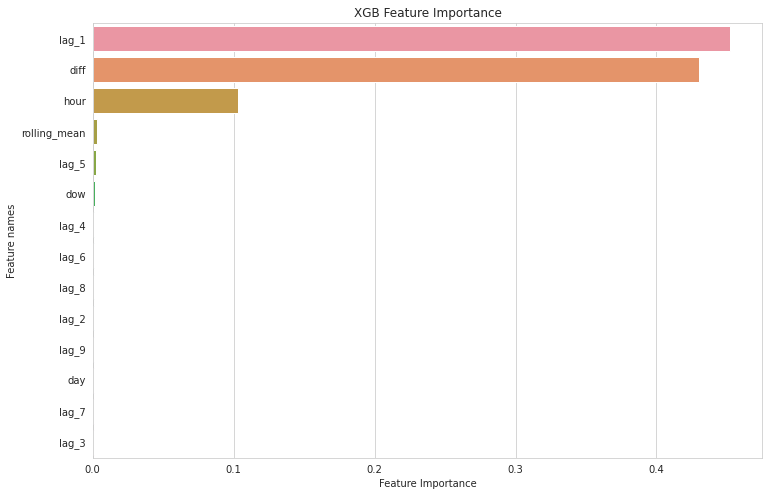

In [43]:
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(X_test.columns)

data={'feature_names':feature_names,'feature_importance':feature_importance}
df_fi = pd.DataFrame(data)

df_fi.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(12,8))
sns.barplot(x=df_fi['feature_importance'], y=df_fi['feature_names'])
plt.title('XGB Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature names')
plt.show()

In [44]:
orders_real = y_test.copy()
orders_predictions = pd.DataFrame(data = predictions, columns = ['predictions'], index = X_test.index.copy())
df_result = pd.merge(orders_real, orders_predictions, how = 'left', left_index = True, right_index = True)

In [45]:
df_result['predictions'] = df_result['predictions'].astype('int64')

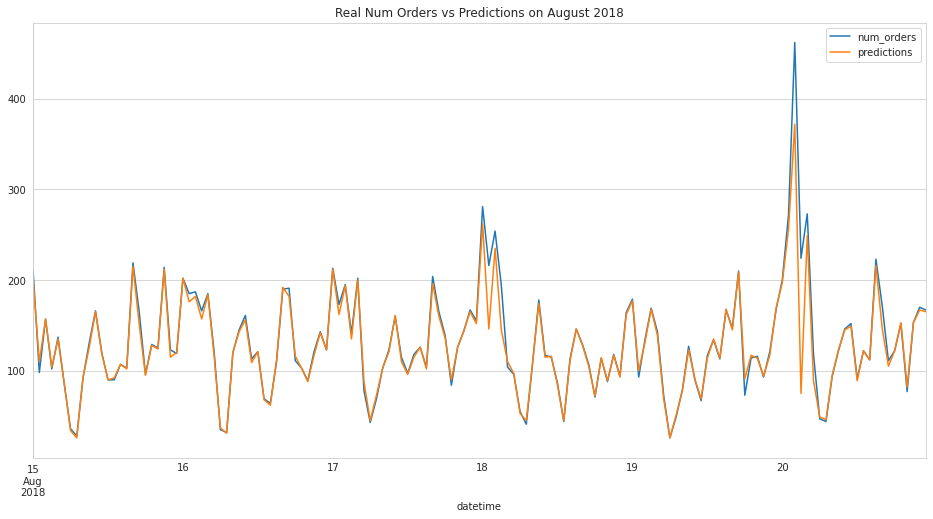

In [46]:
df_result['2018-08-15':'2018-08-20'].plot(figsize=(16,8))
plt.title('Real Num Orders vs Predictions on August 2018')
plt.show()

Hasil yang didapatkan sudah cukup mirip dengan grafik data tes. 

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Kesimpulan

Pada proyek ini kita membuat model untuk memprediksi jumlah pesanan taksi untuk satu jam ke depan dari data historis tentang pesanan taksi di bandara. Dengan pertimbangan model tersebut memiliki RMSE dibawah 48.

- Dataset berupa data historis tentang pesanan taksi di bandara dari bulan Maret hingga Agustus tahun 2018.
- Setelah dilakukan dekomposisasi terlihat data memiliki tren dan seasonal per 7 hari.
- Disini kita menambahkan kolom diff, lag, day, dan juga hour.
- Train test split dengan presentasi data test 10% dari total dataset, sehingga test data dimulai dati 2018-08-13 14:00:00 hingga akhir Agustus.
- Pemodelan dilakukan dengan beberapa etimator regressor seperti, Decision Tree, Random Forest, Linear Regression, XGBoost, CatBoost, dan LGBM.
- Hasil XGBoost mendapatkan skor RMSE terbaik untuk gradient boosting estimator dengan RMSE: 12.276016010354766.
- Kemudian dilakukan hyperparameter tuning dengan beberapa hyperparameter pada model XGBoost dan didapat RMSE : 15.582971806512425.
- Berdasarkan feature importance kolom lag_1 dan diff memiliki skor tertinggi pada model tersebut.

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- Kesimpulan umum itu dari langkah 1 sampai langkah terakhir ya kak
    - jadi tidak hanya bagian modeling saja ya.
    - jadi bisa ditambahkan kesimpulan terkait data preprocessing, data visualization dll

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak sudah ditambahkan.
</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-block alert-warning">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good Job Fawwaz! Sebagian besar kamu telah menyelesaikan project ini dengan baik namun masih ada beberapa hal yang bisa diimprove yang saya tandai dengan comment berwarna kuning dan merah. Jika kamu telah merevisinya, projectmu akan di approve dan kamu bisa lanjut ke tahapan selanjutnya!. 
    
Keep going Fawwaz, you are doing very well!
    

</div>

<div class="alert alert-block alert-warning">

# General comments #2
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good Job Fawwaz! Masih ada sedikit revisi ya!
    

</div>

<div class="alert alert-block alert-success">

# General comments #3
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good Job Fawwaz! Revisi sudah sesuai ya!
    

</div>

# Daftar Periksa Penilaian

- [x]  Jupyter Notebook bisa dibuka.
- [ ]  Tidak ada kesalahan dalam kode
- [ ]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi.
- [ ]  Data telah diunduh dan disiapkan
- [ ]  Data telah dianalisis
- [ ]  Model sudah dilatih dan hiperparameter sudah dipilih
- [ ]  Model sudah dievaluasi. Kesimpulan sudah ada.
- [ ] *RMSE* untuk *test set* tidak lebih dari 48